# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [3]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.5 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from unet_clonable import *
from diffusion_model_fid import *
import math
import numpy as np

import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


# Hyperparameters

In [5]:
# architecture of attention unet
image_size = 64
widths = [32, 64, 96, 128]
block_depth = 2
diffusion_steps = 1000
# optimization
batch_size = 64
learning_rate = 1e-3
weight_decay = 1e-4
checkpoint_path = "checkpoints/diffusion_model/diffusion_steps_%d_chanel%d_attention_%d"%(diffusion_steps,max(widths),min(Attn_resolutions))

#other hyperparameters of model are stored at diffusion_model.py

# Data Pipeline

In [6]:
# load dataset
#could setting in diffusion model.py
train_dataset_example ,train_dataset, info = prepare_dataset("train[:80%] + validation[:80%] + test[:80%]", with_info=True)
val_dataset = prepare_dataset("train[80%:]+ validation[80%:] + test[80%:]")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQXYMEG/oxford_flowers102-train.tfrecord*…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQXYMEG/oxford_flowers102-test.tfrecord*.…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteQXYMEG/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


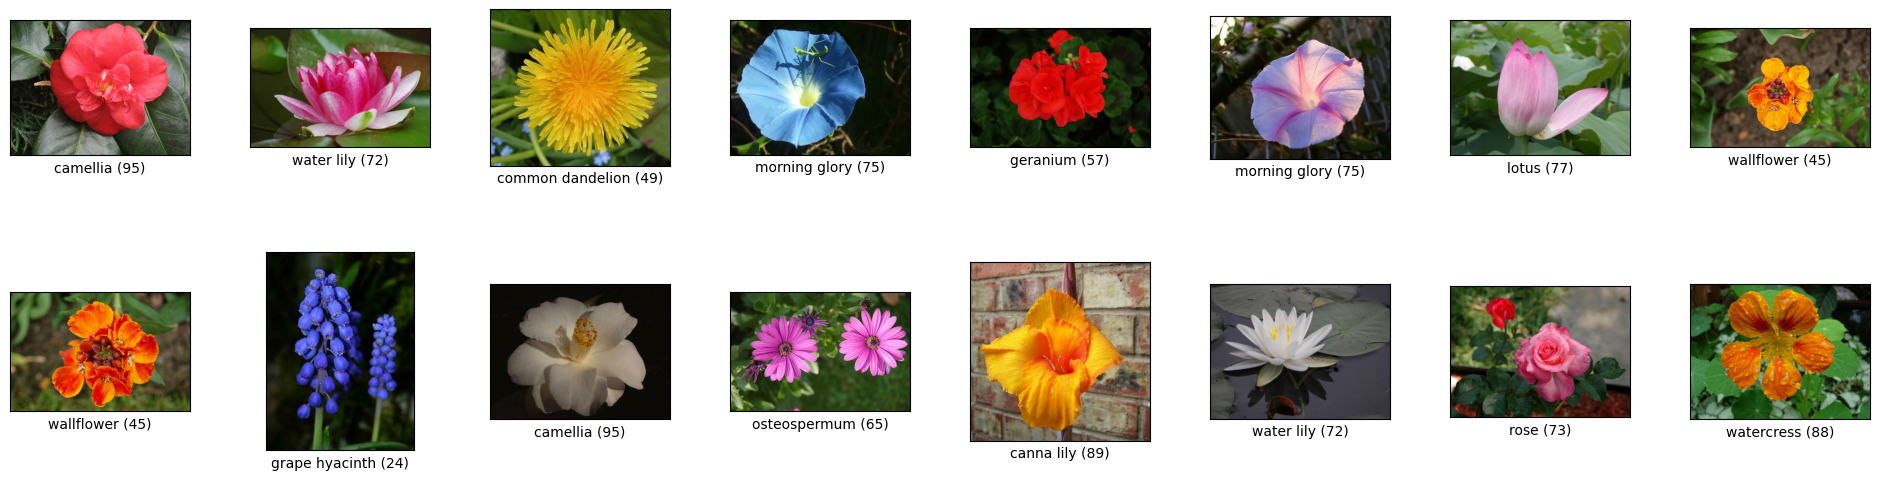

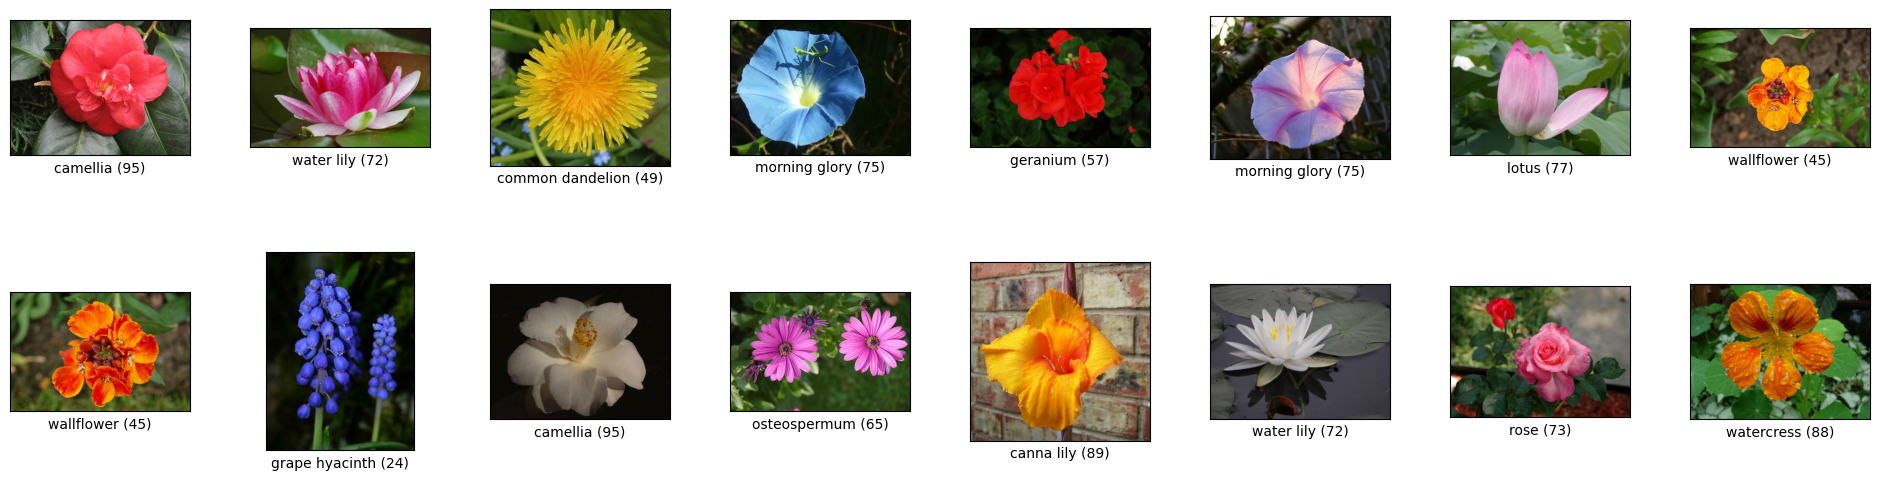

In [7]:
tfds.show_examples(train_dataset_example, info, rows=2, cols=8)

# inference

In [8]:
model2 = DiffusionModel(image_size, widths, block_depth, diffusion_steps=diffusion_steps)
model2.normalizer.adapt(train_dataset)
model2.compile(
    optimizer=tfa.optimizers.AdamW(
        learning_rate=learning_rate,
        weight_decay=weight_decay),
    loss=keras.losses.mean_absolute_error,  # pixelwise mean absolute error is used as loss, mse also ok
    run_eagerly = True )


87910968/87910968 [==============================] - 0s 0us/step


In [9]:
# load the best model and generate images
model2.load_weights(checkpoint_path)

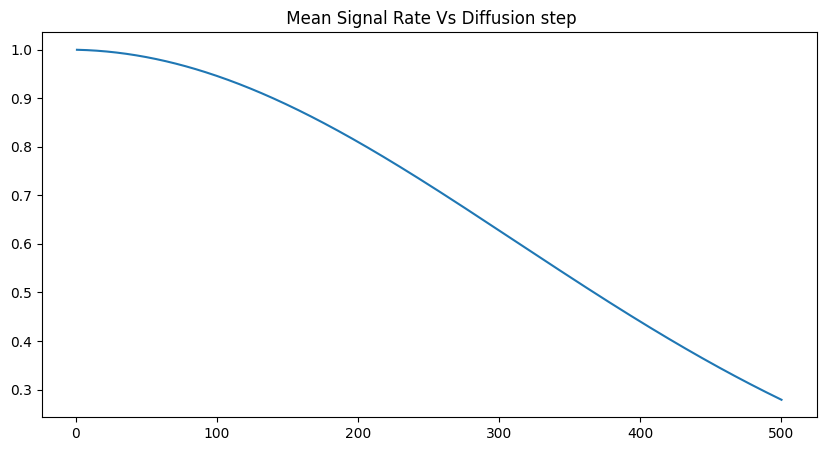

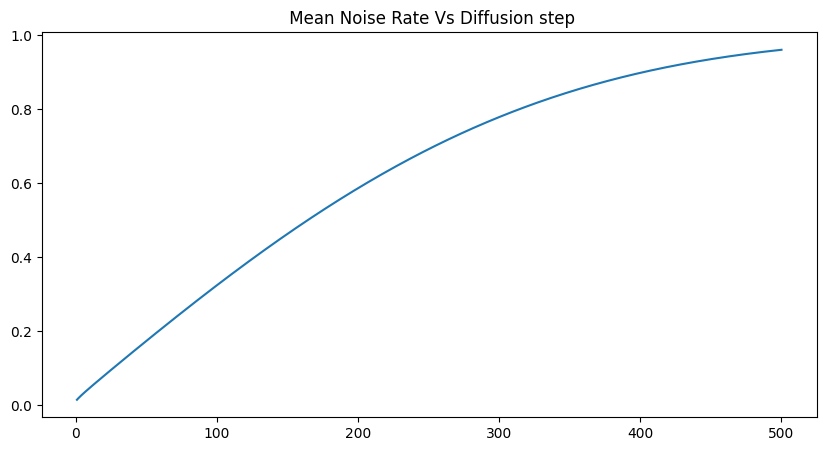

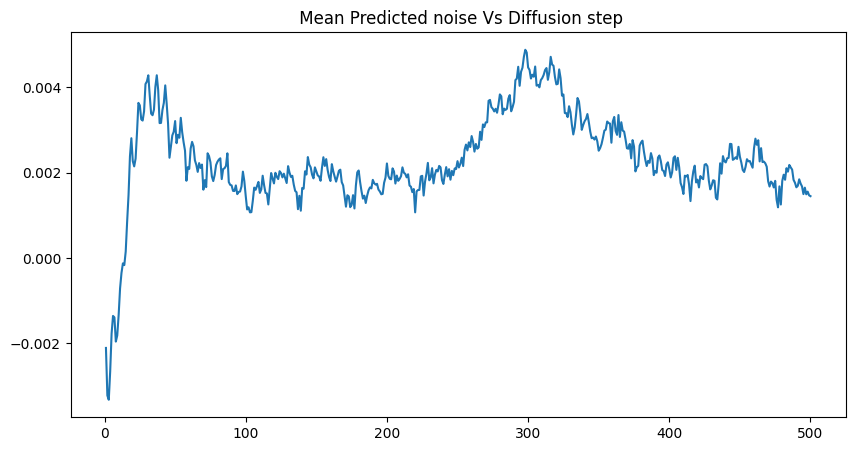

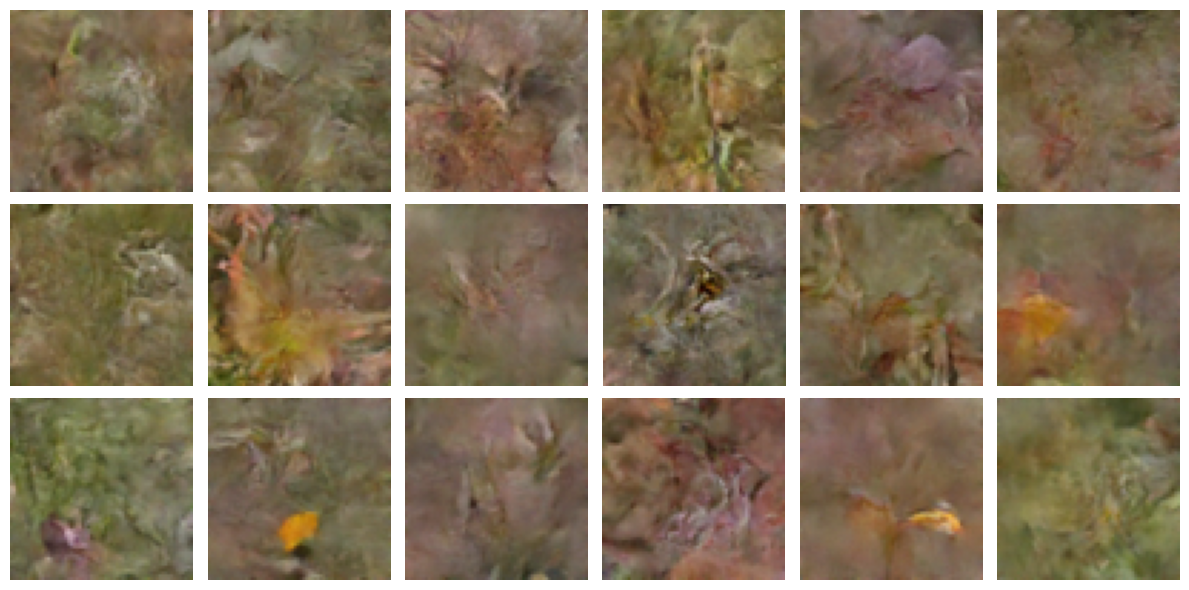

In [10]:
model2.plot_images(plot_diffusion_steps = int(0.5*diffusion_steps), epoch=0 , gen_plot =True)

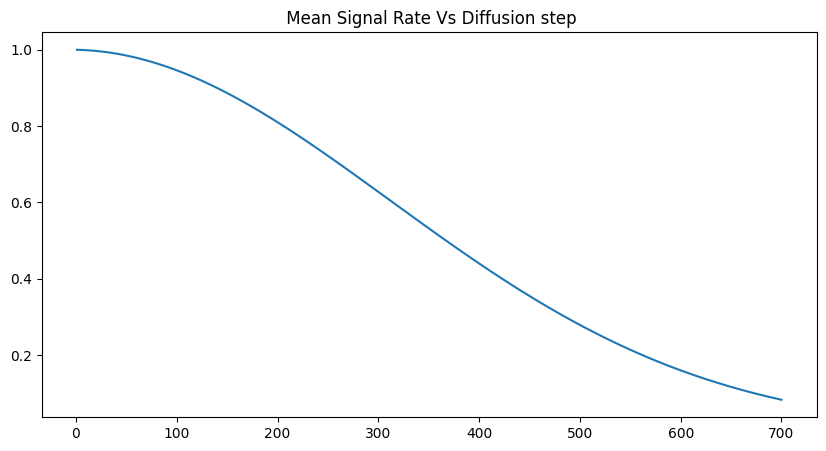

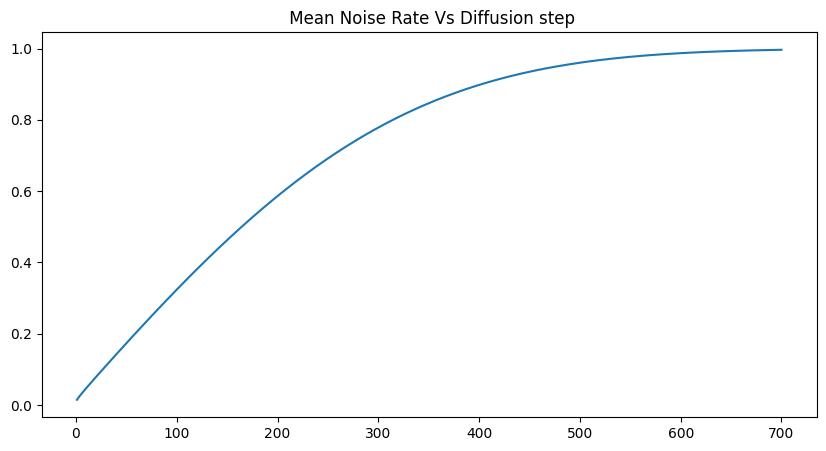

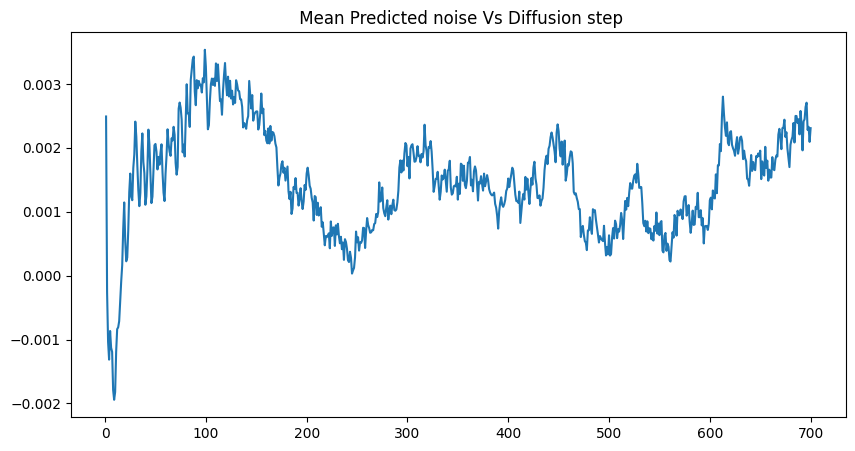

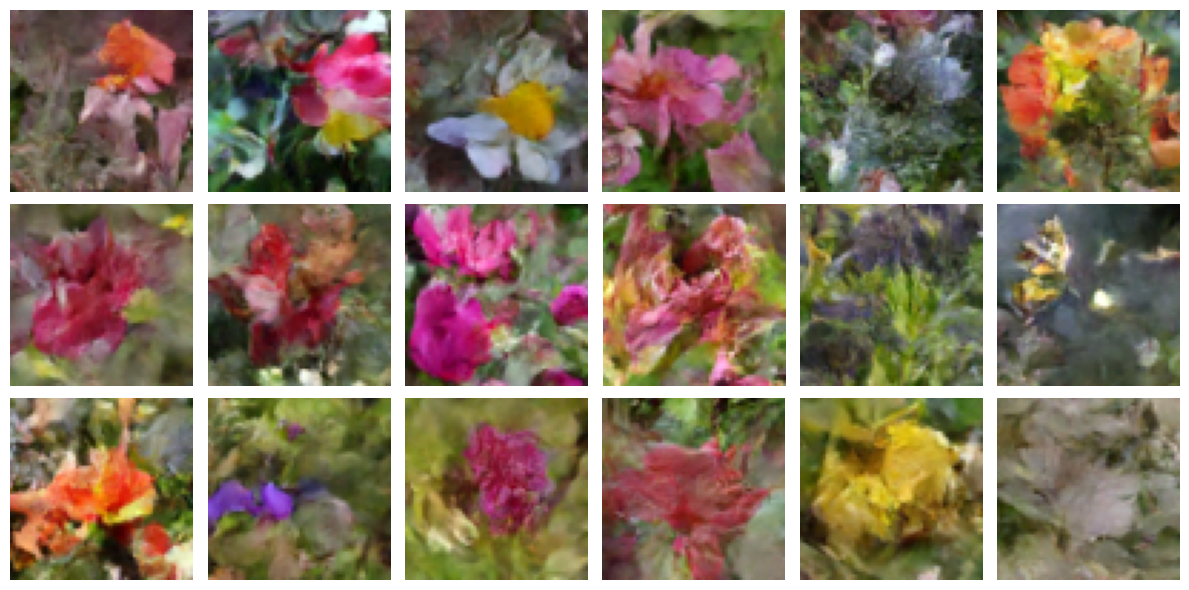

In [11]:
model2.plot_images(plot_diffusion_steps = int(0.7*diffusion_steps), epoch=0, gen_plot =True  )

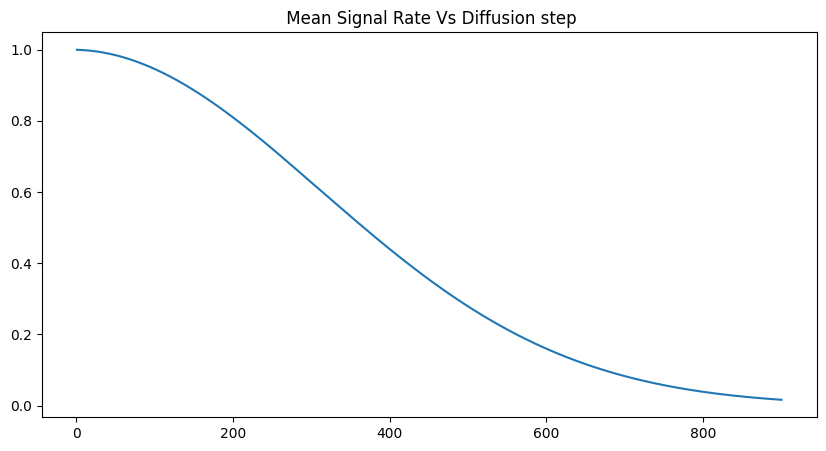

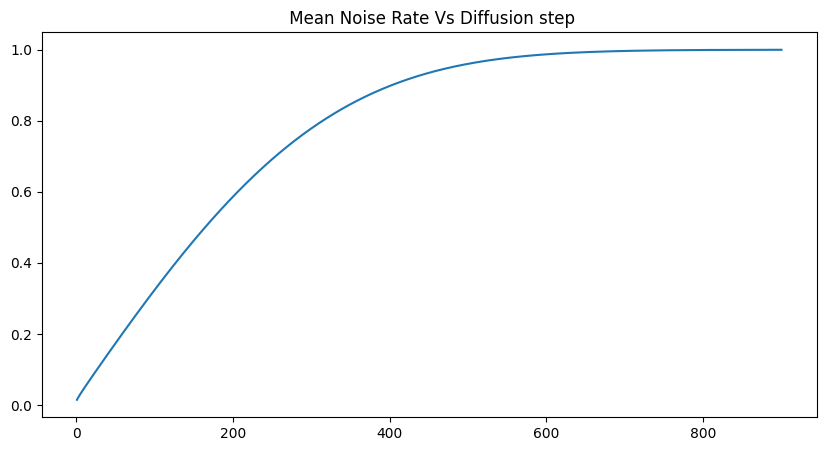

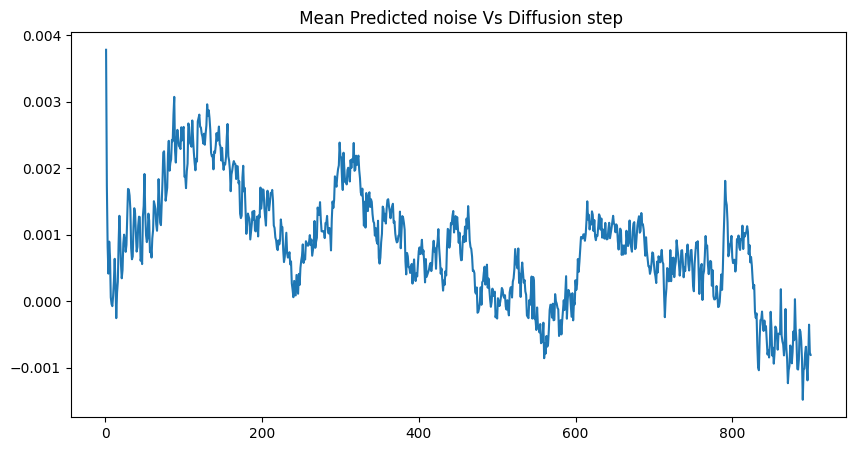

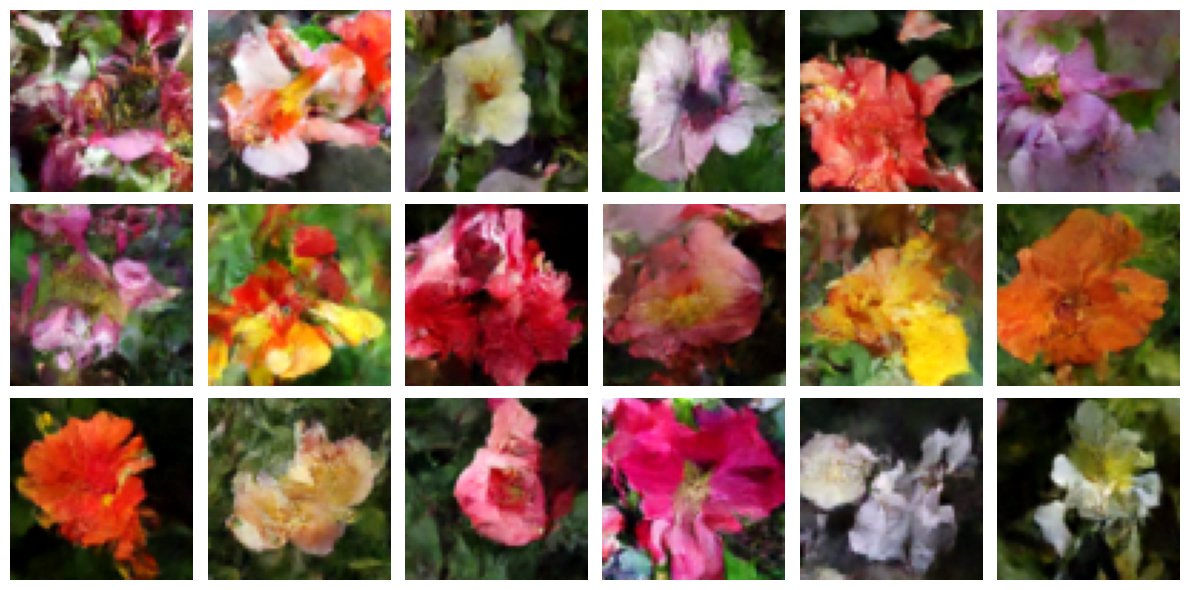

In [12]:
model2.plot_images(plot_diffusion_steps=int(0.9*diffusion_steps), epoch=0 , gen_plot =True )